In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [2]:
df = pd.read_csv('heart.csv')
df

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
X = df.drop(columns='output')
y = df['output']

In [15]:
# Scale data - mean 0 std dev 1

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [31]:
model = keras.Sequential([
    layers.Dense(8, input_dim=13, activation='relu'),
    layers.Dense(1, activation='sigmoid')
    ])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 8)                 112       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 9         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Set some model hyperparameters
from tensorflow.keras.optimizers import Adam

lr = 0.001  # Set the learning rate. Start with default for Adam, 0.001
optimizer = Adam(learning_rate=lr)  # Set the optimizer. Start with adam.

# Compile the model--a necessary step with Keras models
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [33]:
history = model.fit(X, y, epochs=150, validation_split=0.25, batch_size=10, verbose=1)


Epoch 1/150
23/23 [==============================] - 0s 5ms/step - loss: 0.6985 - accuracy: 0.5727 - val_loss: 0.9216 - val_accuracy: 0.3158
Epoch 2/150
23/23 [==============================] - 0s 2ms/step - loss: 0.6277 - accuracy: 0.6564 - val_loss: 0.8969 - val_accuracy: 0.3553
Epoch 3/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5692 - accuracy: 0.7093 - val_loss: 0.8772 - val_accuracy: 0.3421
Epoch 4/150
23/23 [==============================] - 0s 2ms/step - loss: 0.5228 - accuracy: 0.7445 - val_loss: 0.8563 - val_accuracy: 0.3553
Epoch 5/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4853 - accuracy: 0.7797 - val_loss: 0.8336 - val_accuracy: 0.3816
Epoch 6/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4539 - accuracy: 0.8194 - val_loss: 0.8265 - val_accuracy: 0.4079
Epoch 7/150
23/23 [==============================] - 0s 2ms/step - loss: 0.4277 - accuracy: 0.8282 - val_loss: 0.8091 - val_accuracy: 0.4605
Epoch 8/150
2

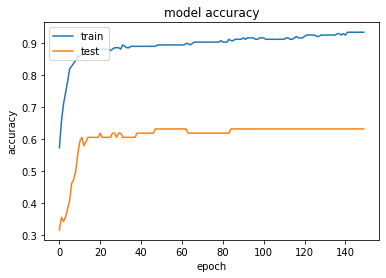

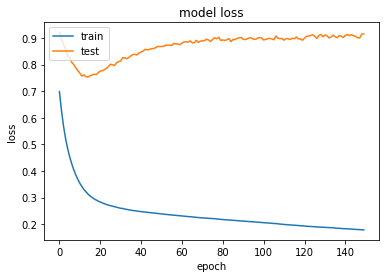

In [34]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [35]:
new_data = pd.DataFrame({
    'age': [40],
    'sex': [1],
    'cp': [2],
    'trtbps': [130],
    'chol': [200],
    'fbs': [0],
    'restecg': [1],
    'thalachh': [160],
    'exng': [0],
    'oldpeak': [1],
    'slp': [2],
    'caa': [0],
    'thall': [3]
})

new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(f'Heart attack High risk probability: {prediction[0][0]}')

Heart attack High risk probability: 0.9790195822715759
